In [18]:
import torch
import numpy as np
import pandas as pd
import os
import torchvision 

In [19]:
from torch.utils.data import Dataset 
import cv2
import matplotlib.pyplot as plt


In [20]:
def unpickle(file):
   import pickle
   with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
   return dict

In [57]:
def generate_noise(img,beta1,beta2,t,ct):
    # img=cv2.imread(path)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=img/255.0
    noise = np.exp(-t / ct)
    noise=np.clip(noise,0,1)
    epsilon=np.random.randn(*img.shape).astype(np.float32)

    new_img=np.sqrt(noise)*img + np.sqrt(1-noise)*epsilon
    new_img=np.clip(new_img,0,1)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(new_img)
    ax[1].set_title(f"Noisy Image (t={t})")
    ax[1].axis("off")

    plt.show()


In [21]:
training=torchvision.datasets.CIFAR10(root='data', train=True, download=True)

100%|██████████| 170M/170M [00:03<00:00, 45.0MB/s] 


Extracting data/cifar-10-python.tar.gz to data


In [43]:
image, label = training[0] 

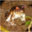

In [44]:
image

In [45]:
image=np.array(image)

In [ ]:
for i in range(1,101):
    generate_noise(image,0.0001,0.02,i,100)

In [ ]:
class Diffusion:
    def __init__(self, beta1,beta2,epsilon) -> None:
        self.beta = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        pass